# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests

%matplotlib inline

In [2]:
# load the twitter-archive-enhanced.csv into a dataframe
twit_arch = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# downlod the image prediction file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [4]:
# load the image-prediction.tsv into a dataframe
image_pred = pd.read_table('image-predictions.tsv')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# I have no access to twitter API, so download the tweet-json provided by Udacity
data = []
with open('tweet-json.txt', 'r')  as file:
    for line in file:
        data.append(json.loads(line))

In [6]:
# extract the contents needed(tweet_id, retweet_count, favorite_count)
deets = []
for item in data:
    tweet_id = item['id']
    retweet_count = item['retweet_count']
    favorite_count = item['favorite_count']
    
    deets.append({'tweet_id': tweet_id,
                 'retweet_count': retweet_count,
                 'favorite_count': favorite_count})

In [7]:
# read the extracted content into a dataframe
twit_like = pd.DataFrame(deets, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
# First assess the tables (twitter-archive-enhanced) visually with google sheets, or any other program, for review, I'll use pandas .sample() function
twit_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1494,692568918515392513,NaN,NaN,2016-01-28 04:44:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's been guarding this pumpk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692568918...,12,10,Chester,None,None,None,None
701,786051337297522688,7.727430e+17,7.305050e+17,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,NaN,NaN,NaN,13,10,None,None,None,None,puppo
1269,709519240576036864,NaN,NaN,2016-03-14 23:19:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vince. He's a Gregorian Flapjeck. Whit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709519240...,9,10,Vince,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2042,671538301157904385,NaN,NaN,2015-12-01 03:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He's very calm. Hasn't eaten i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671538301...,8,10,Baxter,None,None,None,None


In [9]:
# Assess the tables(image-prediction) visually
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1857,841680585030541313,https://pbs.twimg.com/media/C65AA7_WoAEGqA9.jpg,1,Chihuahua,0.547401,True,bow_tie,0.198361,False,Pembroke,0.058492,True
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True
1582,796759840936919040,https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg,1,American_Staffordshire_terrier,0.463996,True,Staffordshire_bullterrier,0.155566,True,Weimaraner,0.137587,True
1492,782969140009107456,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
1148,731156023742988288,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False


In [10]:
# Assess the tables(retweet and tweet likes) visually
twit_like.sample(5)

,tweet_id,retweet_count,favorite_count
1826,676263575653122048,609,2243
168,859196978902773760,25661,75193
338,832273440279240704,2673,12385
1061,741067306818797568,3520,10342
1364,702671118226825216,634,2398


Assess each table programatically with pandas methods or functions(.head(), .describe(), .duplicated(), .info(), e.t.c)

In [11]:
# Assess each table programatically (twitter-archive-enhanced)
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# show statistical summary of table
twit_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# check number of duplicated rows
sum(twit_arch.duplicated())

0

In [14]:
# show number of missing values in each column
twit_arch.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
# Assess each table programatically (image-prediction)
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# show statistical summary of table
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
# check number of duplicated rows
sum(image_pred.duplicated())

0

In [18]:
# Assess each table programatically (tweet-json)
twit_like.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [19]:
# show statistical summary of table
twit_like.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [20]:
# check number of duplicated rows
sum(twit_like.duplicated())

0

### Quality issues
1. twitter-archive-enhanced table: Source column is not in a proper format

2. twitter-archive-enhanced table: Columns that are not relevant to analysis are present

3. twitter-archive-enhanced table: incorrect datatype for timestamp column

4. image-prediction table: missing records leading to incomplete dataset (2075 out of 2356)

5. twitter-archive-enhanced table: Null values represented as None in name column

6. image-prediction table: some values in P1, P2 ans p3 columns begin with lowercase

7. twitter-archive-enhanced table: maximum and minimum value for rating_denominator column are 170 and 0 instead of 10

8. image-preiction table: p1, p2 and p3 column values containing underscore(_)

### Tidiness issues
1. twitter-archive-enhanced table: Dog stages are divided into columns 

2. image-preiction table: names of columns are not explanatory

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
twit_arch_cp = twit_arch.copy()
image_pred_cp = image_pred.copy()
twit_like_cp = twit_like.copy()

In [22]:
twit_arch_cp.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
333,832757312314028032,NaN,NaN,2017-02-18 01:03:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Willow. She's the official strawberry ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832757312...,13,10,Willow,None,None,None,None


### Issue #1: twitter-archive-enhanced table: Columns that are not relevant to analysis are present

#### Define: Drop columns that are not needed for analysis

#### Code

In [23]:
# define the columns to drop
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
# drop the columns
twit_arch_cp.drop(cols, axis = 1, inplace = True)

#### Test

In [24]:
# check if the columns are dropped
twit_arch_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #2: twitter-archive-enhanced table: incorrect datatype for timestamp column

#### Define: Convert the timestamp coumn from object data type to datetime data type

#### Code

In [25]:
# use pd.to_datetime function
twit_arch_cp['timestamp'] = pd.to_datetime(twit_arch_cp['timestamp'])

#### Test

In [26]:
# confirm if the change has been made
twit_arch_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #3: twitter-archive-enhanced table: Null values represented as None and 'a' in name column

#### Define: convert None and 'a' in name column to NaN values with np.nan

#### Code

In [27]:
# check the values in name column
twit_arch_cp.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [28]:
# replace the 'none' and 'a' values with NaN value
(twit_arch_cp['name']).replace(['None', 'a'], np.nan, inplace = True)



#### Test

In [29]:
# confirm if the change has been made
twit_arch_cp.name.value_counts()

Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: name, Length: 955, dtype: int64

### Issue #4: **image-prediction table**: some fields in P1, P2 ans p3 columns begin with lowercase

#### Define: Change the starting characters in the columns to uppercase

#### Code

In [30]:
# capitalize the first characters and characters after a delimeter
image_pred_cp['p1'] = image_pred_cp['p1'].str.title()
image_pred_cp['p2'] = image_pred_cp['p2'].str.title()
image_pred_cp['p3'] = image_pred_cp['p3'].str.title()

#### Test

In [31]:
# check if the change has been made
image_pred_cp.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False


### Issue #5: **image-preiction table**: p1, p2 and p3 column values containing underscore(_)

#### Define: Replace underscore(_) with white space(' ') in the elemets of the columns

#### Code

In [32]:
# replace underscore with white space
image_pred_cp['p1'] = image_pred_cp['p1'].str.replace('_', ' ')
image_pred_cp['p2'] = image_pred_cp['p2'].str.replace('_', ' ')
image_pred_cp['p3'] = image_pred_cp['p3'].str.replace('_', ' ')

#### Test

In [33]:
# confirm if the change has been made
image_pred_cp.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1153,732726085725589504,https://pbs.twimg.com/media/CisqdVcXEAE3iW7.jpg,1,Pomeranian,0.961902,True,Samoyed,0.024289,True,Chow,0.005772,True
405,673707060090052608,https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg,1,German Short-Haired Pointer,0.935771,True,Kelpie,0.022561,True,Labrador Retriever,0.008847,True
1456,777641927919427584,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,Golden Retriever,0.964929,True,Labrador Retriever,0.011584,True,Refrigerator,0.007499,False
749,687818504314159109,https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg,1,Lakeland Terrier,0.873029,True,Soft-Coated Wheaten Terrier,0.060924,True,Toy Poodle,0.017031,True
254,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,Dhole,0.350416,False,Hare,0.236661,False,Wood Rabbit,0.091133,False


### Issue #6: **twitter-archive-enhanced table**: maximum and minimum value for rating_denominator column are 170 and 0 instead of 10

#### Define: Replace all denominator that has the value of 170 and 0 to 10

#### Code

In [34]:
# replace any denominator value less than 10 woth 10
twit_arch_cp[twit_arch_cp['rating_denominator'] < 10] = 10
# replace any denominator value greater than 10 woth 10
twit_arch_cp[twit_arch_cp['rating_denominator'] > 10] = 10

#### Test

In [35]:
# check for correction
twit_arch_cp['rating_denominator'].describe()

count    2356.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

### Issue #7: twitter-archive-enhanced table: Source column is not in a proper format

#### Define: Extract tweet source from long complicated string

#### Code

In [36]:
#extract the tweet source
twit_arch_cp['source'] = twit_arch_cp['source'].str.split("/").str[4]
twit_arch_cp['source'] = twit_arch_cp['source'].str.split('>').str[1]
twit_arch_cp['source'] = twit_arch_cp['source'].str.replace('<', " ")

#### Test

In [37]:
# confirm if the change has been made
twit_arch_cp['source'].value_counts()

Twitter for iPhone     2198
TweetDeck                11
Name: source, dtype: int64

### Issue #8: **twitter-archive-enhanced table**: Dog stages are divided into columns

#### Define: Convert the different dog stages columns into a single column containing the value of dog stage

#### Code

In [38]:
# replace none values with NaN
dog = ["doggo","floofer","pupper","puppo"]
twit_arch_cp[dog] = twit_arch_cp[dog].replace({'None':np.nan})

In [39]:
# create a new column to represent dog stages by merging all relevant columns
twit_arch_cp['dog_stage'] = twit_arch_cp[twit_arch_cp.columns[8:]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [40]:
# replace whitespace with NaN in the newly created column
twit_arch_cp['dog_stage'] = twit_arch_cp['dog_stage'].replace('',np.nan)
#drop columns after merging
twit_arch_cp.drop(["doggo","floofer","pupper","puppo"], axis=1, inplace=True)

In [41]:
# check the values of the new column
twit_arch_cp.dog_stage.value_counts()

pupper           245
doggo             83
puppo             29
10,10,10,10       23
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

A value 10,10,10,10 is present, this is not a valid value of the dog_stage column, lets check for duplicates in the dataset

In [42]:
sum(twit_arch_cp.duplicated())

22

In [43]:
# drop duplicated rows
twit_arch_cp.drop_duplicates(inplace = True)
# check the values of the new column if there's still 10,10,10,10 present
twit_arch_cp.dog_stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
10,10,10,10        1
Name: dog_stage, dtype: int64

In [44]:
# replace the value with NaN
twit_arch_cp['dog_stage'] = twit_arch_cp['dog_stage'].replace('10,10,10,10', np.nan)

In [45]:
twit_arch_cp.dog_stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

#### Test

In [46]:
twit_arch_cp.sample(7)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
129,867421006826221569,2017-05-24 16:44:18+00:00,Twitter for iPhone,This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,puppo
545,805826884734976000,2016-12-05 17:31:15+00:00,Twitter for iPhone,This is Duke. He is not a fan of the pupporazz...,https://twitter.com/dog_rates/status/805826884...,12,10,Duke,NaN
1131,728986383096946689,2016-05-07 16:34:32+00:00,Twitter for iPhone,This is Puff. He started out on the streets (f...,https://twitter.com/dog_rates/status/728986383...,11,10,Puff,NaN
894,759197388317847553,2016-07-30 01:22:17+00:00,Twitter for iPhone,This is Luna. She's just heckin precious af I ...,https://twitter.com/dog_rates/status/759197388...,12,10,Luna,NaN
374,828372645993398273,2017-02-05 22:40:03+00:00,Twitter for iPhone,This is Alexander Hamilpup. He was one of the ...,https://twitter.com/dog_rates/status/828372645...,12,10,Alexander,NaN
574,801127390143516673,2016-11-22 18:17:08+00:00,Twitter for iPhone,RT @dog_rates: This is Anakin. He strives to r...,https://twitter.com/dog_rates/status/775733305...,11,10,Anakin,doggo
1172,720389942216527872,2016-04-13 23:15:21+00:00,Twitter for iPhone,This is Ralphé. He patrols the lake. Looking f...,https://twitter.com/dog_rates/status/720389942...,11,10,Ralphé,NaN


### Issue #9: image-preiction table: names of columns are not explanatory

#### Define: Rename the columns in image-prediction dataset 

#### Code

In [47]:
image_pred_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
# rename the vague column names
image_pred_cp.rename(columns = {'jpg_url':'image_url', 'p1':'first_prediction',
                                'p2':'second_prediction', 'p3':'third_prediction',
                               'p1_dog':'first_is_dog', 'p2_dog':'second_is_dog',
                               'p3_dog':'third_is_dog', 'p1_conf':'first_pred_score',
                               'p2_conf':'second_pred_score', 'p3_conf':'third_pred_score'}, inplace = True)

#### Test

In [49]:
image_pred_cp.sample()

,tweet_id,image_url,img_num,first_prediction,first_pred_score,first_is_dog,second_prediction,second_pred_score,second_is_dog,third_prediction,third_pred_score,third_is_dog
910,700747788515020802,https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg,1,Great Pyrenees,0.481333,True,Samoyed,0.311769,True,Maltese Dog,0.074962,True


### Issue #10: **image-prediction table**: missing records leading to incomplete dataset (2075 out of 2356)

#### Define: Merge all the tables(image-prediction, tweet-json, twitter archive) table to drop rows with no records

#### Code

In [50]:
# merge twit_arch_cp with image_pred_cp
twit_image_merged = pd.merge(twit_arch_cp, image_pred_cp, on='tweet_id', how='inner')

In [51]:
# merge twit_image_merged with twit_like_cp
all_df_merged = pd.merge(twit_image_merged, twit_like_cp, on = 'tweet_id', how = 'inner')

#### Test

In [52]:
twit_image_merged.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,image_url,img_num,first_prediction,first_pred_score,first_is_dog,second_prediction,second_pred_score,second_is_dog,third_prediction,third_pred_score,third_is_dog
1146,701570477911896070,2016-02-22 00:53:31+00:00,Twitter for iPhone,This is Yoda. He's a Zimbabwean Rutabaga. Frea...,https://twitter.com/dog_rates/status/701570477...,9,10,Yoda,NaN,https://pbs.twimg.com/media/Cbx6nz1WIAA0QSW.jpg,1,Yorkshire Terrier,0.907990,True,Silky Terrier,0.076883,True,Australian Terrier,0.008473,True
552,787810552592695296,2016-10-17 00:20:47+00:00,Twitter for iPhone,This is Frank. He wears sunglasses and walks h...,https://twitter.com/dog_rates/status/787810552...,11,10,Frank,NaN,https://pbs.twimg.com/media/Cu7dg2RXYAIaGXE.jpg,2,Pug,0.362835,True,French Bulldog,0.221864,True,English Setter,0.080418,True
1534,676603393314578432,2015-12-15 03:23:14+00:00,Twitter for iPhone,This is Godzilla pupper. He had a ruff childho...,https://twitter.com/dog_rates/status/676603393...,9,10,Godzilla,pupper,https://pbs.twimg.com/media/CWPHMqKVAAAE78E.jpg,1,Whippet,0.877021,True,Great Dane,0.034182,True,Boxer,0.028404,True
146,858107933456039936,2017-04-28 23:57:28+00:00,Twitter for iPhone,This is Wyatt. He had an interview earlier tod...,https://twitter.com/dog_rates/status/858107933...,12,10,Wyatt,NaN,https://pbs.twimg.com/media/C-icm_WXUAAmuRR.jpg,1,Golden Retriever,0.863874,True,Labrador Retriever,0.015920,True,Doormat,0.010615,False
157,854732716440526848,2017-04-19 16:25:34+00:00,Twitter for iPhone,This is Marlee. She fetched a flower and immed...,https://twitter.com/dog_rates/status/854732716...,12,10,Marlee,NaN,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,1,Pembroke,0.695548,True,Cardigan,0.058902,True,Chow,0.028411,True


In [53]:
all_df_merged.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,image_url,...,first_pred_score,first_is_dog,second_prediction,second_pred_score,second_is_dog,third_prediction,third_pred_score,third_is_dog,retweet_count,favorite_count
1718,672231046314901505,2015-12-03 01:49:05+00:00,Twitter for iPhone,Exotic underwater dog here. Very shy. Wont ret...,https://twitter.com/dog_rates/status/672231046...,5,10,NaN,NaN,https://pbs.twimg.com/media/CVQ-kfWWoAAXV15.jpg,...,0.823919,False,Grey Whale,0.036601,False,Hammerhead,0.029522,False,1089,1956
24,887101392804085760,2017-07-18 00:07:08+00:00,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,NaN,NaN,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,...,0.733942,True,Eskimo Dog,0.035029,True,Staffordshire Bullterrier,0.029705,True,6167,31061
799,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,2772,5569
564,785639753186217984,2016-10-11 00:34:48+00:00,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,"doggo,pupper",https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,...,0.978042,False,Sea Urchin,0.006106,False,Echidna,0.005442,False,2561,8735
975,719367763014393856,2016-04-11 03:33:34+00:00,Twitter for iPhone,Meet Sid &amp; Murphy. Murphy floats alongside...,https://twitter.com/dog_rates/status/719367763...,11,10,Sid,NaN,https://pbs.twimg.com/media/Cfu1KSRXEAACC5X.jpg,...,0.171486,False,Soft-Coated Wheaten Terrier,0.050971,True,Tibetan Terrier,0.047759,True,827,3022


In [54]:
all_df_merged.shape

(2055, 22)

### Issue #11: timestamp column contains month, year and data

#### Define: Split the timestamp column into seperate year and month column

#### Code


In [55]:
# create year, month and day from timestamp
all_df_merged['year'] = pd.to_datetime(all_df_merged['timestamp']).dt.year
all_df_merged['month'] = pd.to_datetime(all_df_merged['timestamp']).dt.strftime('%B')
all_df_merged['day'] = pd.to_datetime(all_df_merged['timestamp']).dt.day_name()

#### Test

In [56]:
all_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2054
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2055 non-null   int64  
 1   timestamp           2055 non-null   object 
 2   source              2025 non-null   object 
 3   text                2055 non-null   object 
 4   expanded_urls       2055 non-null   object 
 5   rating_numerator    2055 non-null   int64  
 6   rating_denominator  2055 non-null   int64  
 7   name                1436 non-null   object 
 8   dog_stage           320 non-null    object 
 9   image_url           2055 non-null   object 
 10  img_num             2055 non-null   int64  
 11  first_prediction    2055 non-null   object 
 12  first_pred_score    2055 non-null   float64
 13  first_is_dog        2055 non-null   bool   
 14  second_prediction   2055 non-null   object 
 15  second_pred_score   2055 non-null   float64
 16  second

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
all_df_merged.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
df = pd.read_csv('twitter_archive_master.csv')
df.shape

(2055, 25)

In [59]:
#  most popular dog breeds to feature on WeRateDogs
df.groupby('first_prediction')[['favorite_count', 
                                'retweet_count']].sum().sort_values(by =
                                'favorite_count', ascending = False)[:10]

,favorite_count,retweet_count
first_prediction,,
Golden Retriever,1665621,569227
Labrador Retriever,1111859,421792
Pembroke,994755,280367
Chihuahua,676441,304218
Samoyed,542991,212438
French Bulldog,465738,121782
Chow,404241,130080
Pug,320223,112830
Cocker Spaniel,315825,122939


In [60]:
# source of tweet
df.groupby('source')['tweet_id'].count()

source
TweetDeck                11
Twitter for iPhone     2014
Name: tweet_id, dtype: int64

In [61]:
# most liked and retweeted dog with its breed 
df.groupby(['name', 'first_prediction', 'second_prediction', 'third_prediction', 'dog_stage'])[['favorite_count',
                        'retweet_count']].sum().sort_values(by = ['favorite_count', 'retweet_count'], ascending = False)[:20]

,,,,,favorite_count,retweet_count
name,first_prediction,second_prediction,third_prediction,dog_stage,,
Jamesy,French Bulldog,Boston Bull,Pug,pupper,106827,32883
Bo,Standard Poodle,Toy Poodle,Tibetan Terrier,doggo,95450,84456
Sunny,Prison,Palace,Umbrella,doggo,49960,43588
Barney,Golden Retriever,Leonberg,Norfolk Terrier,doggo,48410,13076
Cupid,Great Pyrenees,Golden Retriever,Pekinese,doggo,40325,11878
Astrid,Staffordshire Bullterrier,American Staffordshire Terrier,Chesapeake Bay Retriever,doggo,38074,21412
Sebastian,Cardigan,Pembroke,Kelpie,puppo,35501,11007
Cassie,Pembroke,Cardigan,Chihuahua,doggo,32467,7711
Gabe,Pomeranian,Samoyed,Maltese Dog,pupper,31800,17209


In [62]:
# popular dog stages
encap  = df.query('dog_stage=="pupper" or dog_stage=="doggo" or dog_stage=="puppo" or dog_stage=="floofer"')
encap.groupby('dog_stage')[
                        'retweet_count'].mean().sort_values(ascending = False)

dog_stage
doggo      7901.552239
puppo      6431.434783
floofer    4968.714286
pupper     2468.209524
Name: retweet_count, dtype: float64

In [63]:
# dog with high ratings(best boy or girl)
df.groupby('name')['rating_numerator'].sum().sort_values(ascending = False)[:20]

name
Atticus    1787
Charlie     128
Tucker      121
Lucy        114
Oliver      113
Cooper      113
Penny       106
Bo           98
Lola         86
Winston      84
Daisy        83
Sadie        82
Logan        75
Toby         74
Koda         70
the          70
Rusty        69
Milo         69
Stanley      68
Bailey       67
Name: rating_numerator, dtype: int64

In [64]:
# dog breeds with high ratings
df.groupby('first_prediction')['rating_numerator'].sum().sort_values(ascending = False)[1:20]

first_prediction
Golden Retriever             1690
Labrador Retriever           1080
Pembroke                     1007
Chihuahua                     897
Pug                           588
Chow                          512
Samoyed                       503
Pomeranian                    489
Toy Poodle                    434
Microphone                    420
Cocker Spaniel                342
Malamute                      327
French Bulldog                293
Chesapeake Bay Retriever      248
Miniature Pinscher            245
Web Site                      224
German Shepherd               220
Cardigan                      219
Staffordshire Bullterrier     216
Name: rating_numerator, dtype: int64

In [65]:
# dog breeds with low ratings
df.loc[df['rating_numerator'] <= 3, ['first_prediction']]

,first_prediction
249,Swing
613,Afghan Hound
829,Traffic Light
985,Chihuahua
1034,Leatherback Turtle
1088,Wild Boar
1172,Mousetrap
1232,Dining Table
1338,Damselfly
1417,Frilled Lizard


In [66]:
# top breed of dog that got highest average retweet
df.groupby(['name', 'first_prediction'])['retweet_count'].mean().sort_values(ascending = False)[:5]

name     first_prediction
Stephan  Chihuahua           56625.0
Duddles  English Springer    45849.0
Bo       Standard Poodle     42228.0
Jamesy   French Bulldog      32883.0
Kenneth  Bubble              31989.0
Name: retweet_count, dtype: float64

In [67]:
# average retweet count by dog stage
df_dog_stage = df.query('dog_stage=="pupper" or dog_stage=="doggo" or dog_stage=="puppo" or dog_stage=="floofer"')
df_dog_stage.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending = False)[:5]

dog_stage
doggo      7901.552239
puppo      6431.434783
floofer    4968.714286
pupper     2468.209524
Name: retweet_count, dtype: float64

In [68]:
# first dog to feature on WeRateDog(breed, etc, )

df['timestamp'] = pd.to_datetime(df['timestamp'])

early = df.loc[df['timestamp'] == df['timestamp'].min(), :]
early.groupby('first_prediction')[['timestamp', 'rating_numerator']].sum()

,rating_numerator
first_prediction,
Welsh Springer Spaniel,8


In [69]:
# most day of the week a dog is rated
df.groupby(['year','day'])['tweet_id'].count().sort_values(ascending = False)

year  day      
2016  Monday       168
      Tuesday      155
      Wednesday    153
      Friday       142
      Thursday     137
      Saturday     132
      Sunday       121
2015  Monday       110
      Thursday     100
      Tuesday       96
      Wednesday     95
      Sunday        93
      Friday        85
      Saturday      83
2017  Friday        64
      Wednesday     63
      Monday        58
      Tuesday       58
      Thursday      52
      Saturday      47
      Sunday        43
Name: tweet_id, dtype: int64

### Insights: After gathering, assessing, cleaning and exploring the data, I have come to a conclusion.
1. The Dog breed with highest total rating, total likes and total retweet count on the WeRateDogs profile is Golden Retriever. From the analysis of the dataset, it is concluded that Golden Retrievers are one of the most popular breed of dogs, followed by Labrador Retriever and Pembroke. This could be due to the fact that they are hardworking, great therapy dogs and they are the cutest, in my opinion.
 
2. The first dog to ever feature on the WeRateDogs profile according to the gathered dataset is a Welsh Springer Spaniel, thsis dog was introduced to us on 15th of November 2015, although no further information like its name and dog stage was provided in the dataset but we know he or she is a good dog with an amazing rating of 8 out of 10.
 
3. 2016 was the busiest year for WeRateDogs and Mondays seem to be the day that dogs are rated the most, possibly to stimulate humans serotonin on the first day of a week. We all know Monday can be a challenging day for most people but after seeing cute and happy faces of dogs, that can put a little smile on our faces.

4. Although there wasn't enough data on the breed of the dog but with the data provided, I was able to analyze the dog breeds with low ratings(3/10 and below), these particular breeds are not bad or anything, they are just unpopular among other dog breeds and probably humans. The breeds are: Afghan Hound, Chihuahua and Maltese Dog.

5. Now on to the most popular dogs also known as our best boys and girls, based on number of likes and retweet. The list of the top 10 dogs are as follows: 
* Jamesy, a French Bulldog who is a pupper
* Bo, a Standard Poodle who is a doggo
* Sunny, a doggo
* Barney, a Golden Retriever who is a doggo
* Cupid, a Great Pyrenees who is a doggo
* Astrid, a Staffordshire Bullterrier who is a doggo
* Sebastian, a Pembroke who is a puppo
* Cassie, a pembroke who is a doggo
* Gabe, a Pomeranian who is a pupper
* Gus, a Labrador Retriever who is a pupper


### Visualization

To see a pictorial representaion of some of the codes above, I have put together some charts to help understand some of the insights made.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### The chart below shows top 10 popular dog breeds in the dataset, it also shows the great difference between likes and retweet

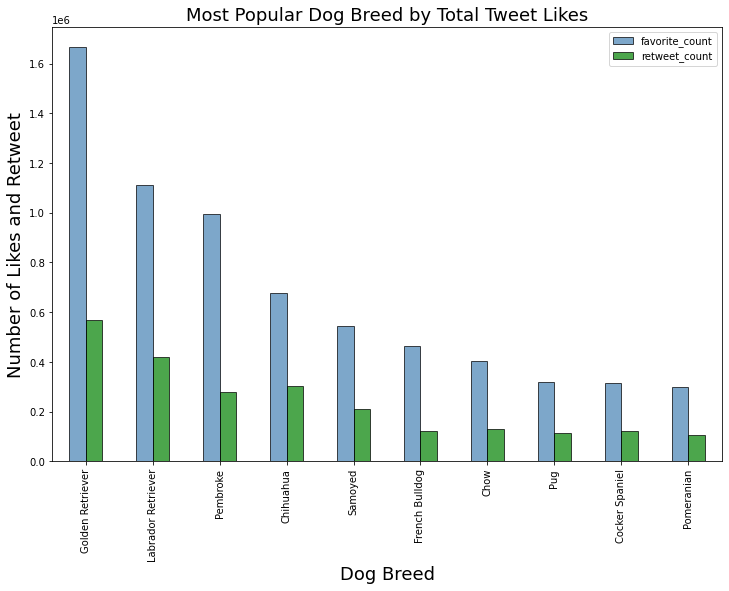

In [71]:
pop_dog = df.groupby('first_prediction')[['favorite_count', 
                                'retweet_count']].sum().sort_values(by = 'favorite_count', ascending = False)[:10]


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

pop_dog.plot(kind = 'bar', color = ['steelblue', 'green'],
             edgecolor='black', linewidth=1.0, alpha=.7, figsize = (12,8))
plt.xlabel('Dog Breed', fontsize = 18)
plt.ylabel('Number of Likes and Retweet', fontsize = 18)
plt.title("Most Popular Dog Breed by Total Tweet Likes", fontsize = 18);

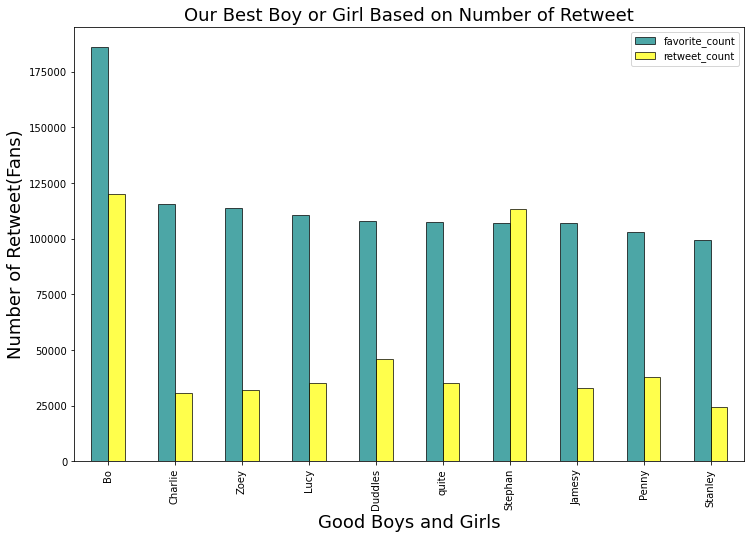

In [72]:
# popular dog on WeRateDogs based on likes
dog = df.groupby('name')[['favorite_count',
                        'retweet_count']].sum().sort_values(by = ['favorite_count', 'retweet_count'], ascending = False)[:10]
dog.plot(kind = 'bar', color = ['teal', 'yellow'],
             edgecolor='black', linewidth=1.0, alpha=.7, figsize = (12,8))
plt.xlabel('Good Boys and Girls', fontsize = 18)
plt.ylabel('Number of Retweet(Fans)', fontsize = 18)
plt.title("Our Best Boy or Girl Based on Number of Retweet", fontsize = 18);

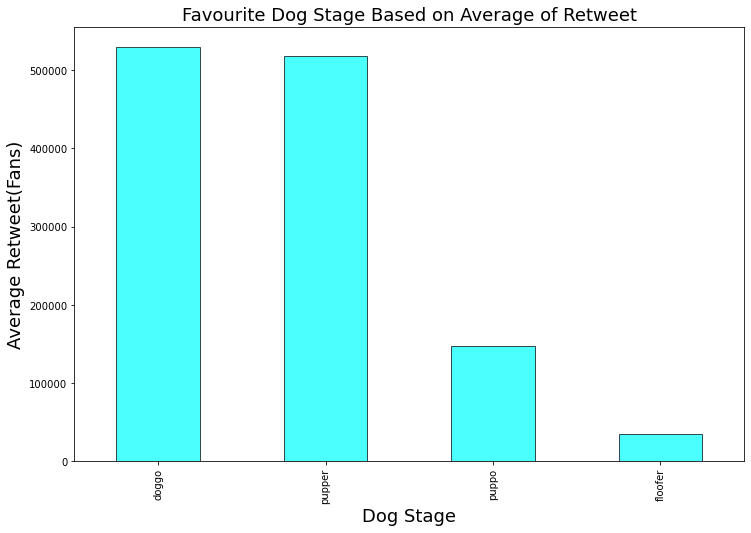

In [73]:
# popular dog stage 
stage = df_dog_stage.groupby('dog_stage')['retweet_count'].sum().sort_values(ascending = False)[:5]

stage.plot(kind = 'bar', color = ['cyan'],
             edgecolor='black', linewidth=1.0, alpha=.7, figsize = (12,8))
plt.xlabel('Dog Stage', fontsize = 18)
plt.ylabel('Average Retweet(Fans)', fontsize = 18)
plt.title("Favourite Dog Stage Based on Average of Retweet", fontsize = 18);

#### The chart below shows the number of dogs that have been rated on a particular day of the week with the popular days being Monday and Friday

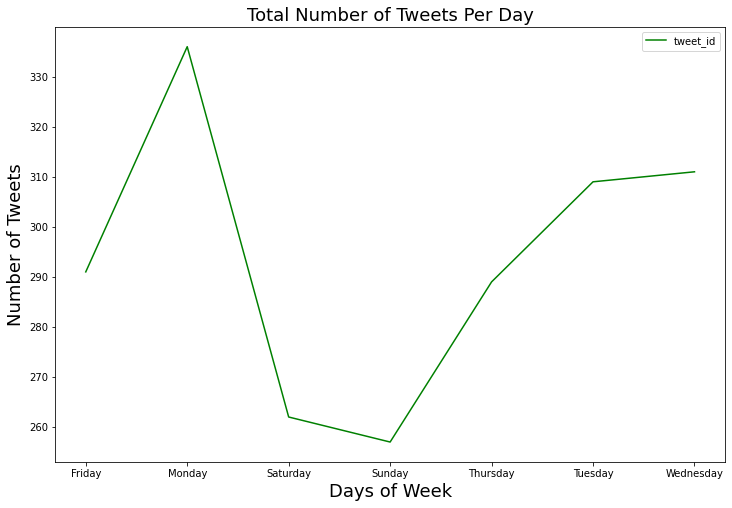

In [74]:
timeline = df.groupby('day')['tweet_id'].count()

timeline.plot(color = 'green', figsize = (12,8))
plt.xlabel('Days of Week', fontsize = 18)
plt.ylabel('Number of Tweets', fontsize = 18)
plt.title('Total Number of Tweets Per Day', fontsize = 18)
plt.legend();